In [1]:
%cd ../..

/home/jaykumaran/uni-vision


/home/jaykumaran/miniconda3/envs/torch_2x/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
pwd

'/home/jaykumaran/uni-vision'

In [3]:
import os
import torch
import torch.nn as nn

from torchinfo import summary
from torchvision import transforms

from uni_vision.pipe.classification.engine.custom_dataclass import CustomDatasetClass
from torch.utils.data import DataLoader
from uni_vision.pipe.classification.models import resnet
from uni_vision.pipe.classification import utils

from uni_vision.configs.train_config import TrainingConfig  
from uni_vision.pipe.classification.engine import train, inference

In [4]:
data_augs_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),

    transforms.Normalize(mean = (0.485, 0.456, 0.406), std = (0.229, 0.224, 0.225)),
])

In [5]:
root_dir = "/home/jaykumaran/opencv-pytorch-project-1-classification/dataset"
train_path = os.path.join(root_dir, "Train")
valid_path = os.path.join(root_dir, "Valid")


train_dataset = CustomDatasetClass(train_path, transform=data_augs_transform)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=16, num_workers=2)

valid_dataset = CustomDatasetClass(valid_path, transform = data_augs_transform)
val_loader = DataLoader(valid_dataset, shuffle=False, batch_size=16, num_workers=2)

# Sanity check
len(next(iter(train_loader)))

len(next(iter(val_loader)))

2

In [6]:
resnet50 = resnet.resnet50(pretrained=False)

resnet50.fc = nn.Linear(in_features = 2048, out_features = 3)

summary(model = resnet50, input_size=(1, 3, 224, 224), row_settings=['var_names'])

Layer (type (var_name))                  Output Shape              Param #
ResNet (ResNet)                          [1, 3]                    --
├─Conv2d (conv1)                         [1, 64, 112, 112]         9,408
├─BatchNorm2d (bn1)                      [1, 64, 112, 112]         128
├─ReLU (relu)                            [1, 64, 112, 112]         --
├─MaxPool2d (maxpool)                    [1, 64, 56, 56]           --
├─Sequential (layer1)                    [1, 256, 56, 56]          --
│    └─BottleNeck (0)                    [1, 256, 56, 56]          --
│    │    └─Sequential (downsample)      [1, 256, 56, 56]          16,896
│    │    └─Conv2d (conv1)               [1, 64, 56, 56]           4,096
│    │    └─BatchNorm2d (bn1)            [1, 64, 56, 56]           128
│    │    └─Conv2d (conv2)               [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d (bn2)            [1, 64, 56, 56]           128
│    │    └─Conv2d (conv3)               [1, 256, 56, 56]          1

In [7]:
import torch.optim as optim
optimizer = optim.AdamW(resnet50.parameters(), lr = 1e-4, weight_decay=1e-4)  # decoupled weighted decay L2

In [8]:
train_config = TrainingConfig(total_epochs=20)
trainer = train.Trainer(train_config= train_config, model = resnet50, train_loader=train_loader, val_loader=val_loader, optimizer=optimizer, total_epochs=train_config.total_epochs)

Logging at: ../train_logs/version_24
Model checkpoint at: ../checkpoints/version_24


Valid:	 Epoch: 1/20	Loss: 0.8324, Acc: 0.6200: 100%|██████████| 19/19 [00:00<00:00, 22.76it/s]



Train Loss: 0.9519    Train Acc: 0.5281
Val Loss  : 0.8324    Val Acc  : 0.6200
Model Improved ... Saving Model ...💾 ......: Saved to ../checkpoints/version_24/best_epoch_1_loss_0.8324.pth✅ ...




Valid:	 Epoch: 2/20	Loss: 0.7314, Acc: 0.6300: 100%|██████████| 19/19 [00:00<00:00, 24.82it/s]



Train Loss: 0.7547    Train Acc: 0.6262
Val Loss  : 0.7314    Val Acc  : 0.6300
Model Improved ... Saving Model ...💾 ......: Saved to ../checkpoints/version_24/best_epoch_2_loss_0.7314.pth✅ ...




Valid:	 Epoch: 3/20	Loss: 0.7462, Acc: 0.6433: 100%|██████████| 19/19 [00:01<00:00, 18.05it/s]



Train Loss: 0.6863    Train Acc: 0.6752
Val Loss  : 0.7462    Val Acc  : 0.6433



Valid:	 Epoch: 4/20	Loss: 0.6043, Acc: 0.7400: 100%|██████████| 19/19 [00:00<00:00, 24.74it/s]



Train Loss: 0.6164    Train Acc: 0.7010
Val Loss  : 0.6043    Val Acc  : 0.7400
Model Improved ... Saving Model ...💾 ......: Saved to ../checkpoints/version_24/best_epoch_4_loss_0.6043.pth✅ ...




Valid:	 Epoch: 5/20	Loss: 0.7506, Acc: 0.6867: 100%|██████████| 19/19 [00:00<00:00, 25.51it/s]



Train Loss: 0.5604    Train Acc: 0.7386
Val Loss  : 0.7506    Val Acc  : 0.6867



Valid:	 Epoch: 6/20	Loss: 0.7755, Acc: 0.6533: 100%|██████████| 19/19 [00:00<00:00, 23.18it/s]



Train Loss: 0.5611    Train Acc: 0.7414
Val Loss  : 0.7755    Val Acc  : 0.6533



Valid:	 Epoch: 7/20	Loss: 0.7187, Acc: 0.7067: 100%|██████████| 19/19 [00:01<00:00, 17.07it/s]



Train Loss: 0.4823    Train Acc: 0.7805
Val Loss  : 0.7187    Val Acc  : 0.7067



Valid:	 Epoch: 8/20	Loss: 0.6710, Acc: 0.6933: 100%|██████████| 19/19 [00:01<00:00, 18.34it/s]



Train Loss: 0.3978    Train Acc: 0.8295
Val Loss  : 0.6710    Val Acc  : 0.6933



Valid:	 Epoch: 9/20	Loss: 0.8495, Acc: 0.6800: 100%|██████████| 19/19 [00:00<00:00, 24.29it/s]



Train Loss: 0.3447    Train Acc: 0.8510
Val Loss  : 0.8495    Val Acc  : 0.6800



Valid:	 Epoch: 10/20	Loss: 0.7416, Acc: 0.7433: 100%|██████████| 19/19 [00:00<00:00, 20.64it/s]



Train Loss: 0.3188    Train Acc: 0.8729
Val Loss  : 0.7416    Val Acc  : 0.7433



Valid:	 Epoch: 11/20	Loss: 1.0100, Acc: 0.6333: 100%|██████████| 19/19 [00:00<00:00, 26.07it/s]



Train Loss: 0.2383    Train Acc: 0.9029
Val Loss  : 1.0100    Val Acc  : 0.6333



Valid:	 Epoch: 12/20	Loss: 0.7338, Acc: 0.7267: 100%|██████████| 19/19 [00:00<00:00, 23.73it/s]



Train Loss: 0.2382    Train Acc: 0.9057
Val Loss  : 0.7338    Val Acc  : 0.7267



Valid:	 Epoch: 13/20	Loss: 0.7958, Acc: 0.7267: 100%|██████████| 19/19 [00:00<00:00, 27.06it/s]



Train Loss: 0.1823    Train Acc: 0.9329
Val Loss  : 0.7958    Val Acc  : 0.7267



Valid:	 Epoch: 14/20	Loss: 1.0375, Acc: 0.7167: 100%|██████████| 19/19 [00:00<00:00, 24.48it/s]



Train Loss: 0.1431    Train Acc: 0.9443
Val Loss  : 1.0375    Val Acc  : 0.7167



Valid:	 Epoch: 15/20	Loss: 0.8069, Acc: 0.7500: 100%|██████████| 19/19 [00:00<00:00, 26.24it/s]



Train Loss: 0.1592    Train Acc: 0.9400
Val Loss  : 0.8069    Val Acc  : 0.7500



Valid:	 Epoch: 16/20	Loss: 0.7104, Acc: 0.7800: 100%|██████████| 19/19 [00:00<00:00, 22.51it/s]



Train Loss: 0.1327    Train Acc: 0.9519
Val Loss  : 0.7104    Val Acc  : 0.7800



Valid:	 Epoch: 17/20	Loss: 0.7954, Acc: 0.7567: 100%|██████████| 19/19 [00:00<00:00, 25.84it/s]



Train Loss: 0.1003    Train Acc: 0.9629
Val Loss  : 0.7954    Val Acc  : 0.7567



Valid:	 Epoch: 18/20	Loss: 0.8420, Acc: 0.7667: 100%|██████████| 19/19 [00:00<00:00, 25.26it/s]



Train Loss: 0.1212    Train Acc: 0.9562
Val Loss  : 0.8420    Val Acc  : 0.7667



Valid:	 Epoch: 19/20	Loss: 0.7975, Acc: 0.7333: 100%|██████████| 19/19 [00:00<00:00, 21.14it/s]



Train Loss: 0.1291    Train Acc: 0.9529
Val Loss  : 0.7975    Val Acc  : 0.7333



Valid:	 Epoch: 20/20	Loss: 0.9131, Acc: 0.7200: 100%|██████████| 19/19 [00:00<00:00, 22.09it/s]



Train Loss: 0.1080    Train Acc: 0.9657
Val Loss  : 0.9131    Val Acc  : 0.7200

Total time: 454.89s, Best Val Loss: 0.604, Best Val Acc: 0.74 ; At Epoch: 4


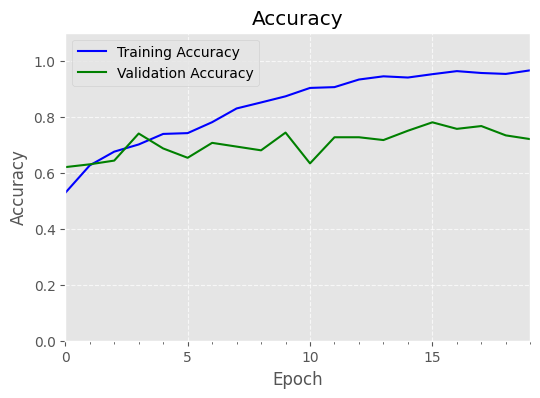

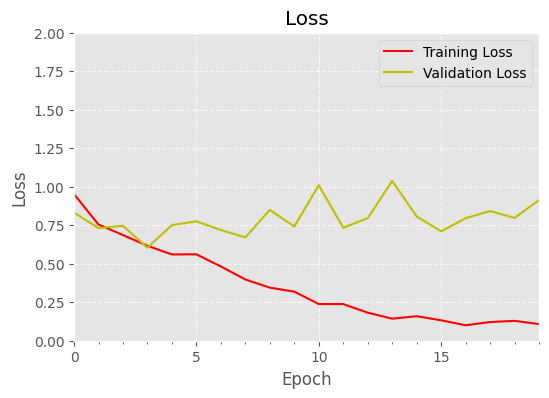

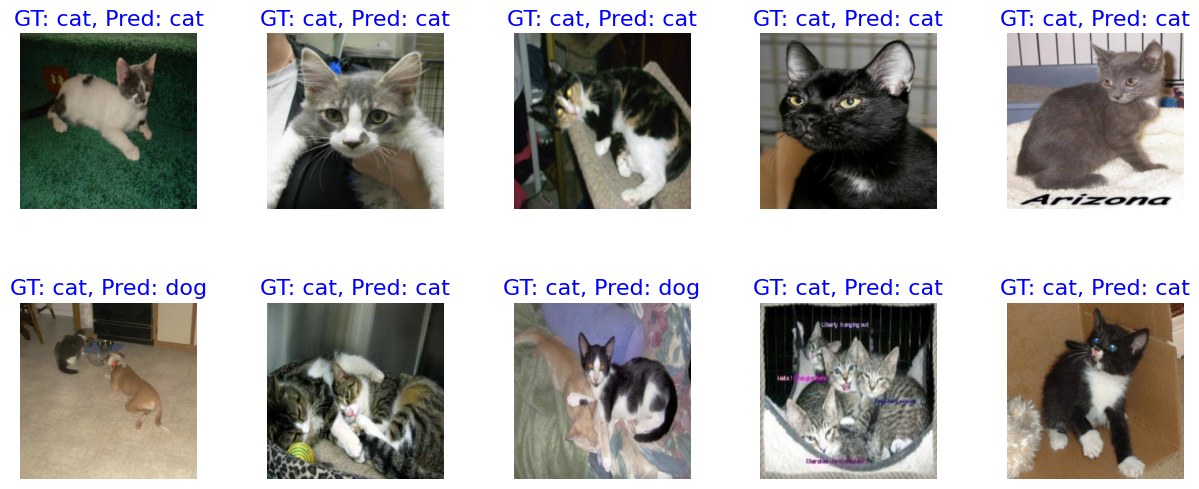

{'train_loss': [0.9518586993217468,
  0.7546820640563965,
  0.6862558126449585,
  0.616397500038147,
  0.560357928276062,
  0.5611109733581543,
  0.48232269287109375,
  0.3977818787097931,
  0.3446543514728546,
  0.31878861784935,
  0.23828202486038208,
  0.23818403482437134,
  0.18229247629642487,
  0.1430869847536087,
  0.15916474163532257,
  0.132697194814682,
  0.10031695663928986,
  0.12124146521091461,
  0.12912826240062714,
  0.10796227306127548],
 'train_acc': [0.5280952453613281,
  0.6261904835700989,
  0.6752380728721619,
  0.700952410697937,
  0.7385714054107666,
  0.741428554058075,
  0.7804762125015259,
  0.8295238018035889,
  0.8509523868560791,
  0.8728571534156799,
  0.9028571248054504,
  0.9057142734527588,
  0.9328571557998657,
  0.9442856907844543,
  0.9399999976158142,
  0.9519047737121582,
  0.9628571271896362,
  0.9561904668807983,
  0.9528571367263794,
  0.9657142758369446],
 'valid_loss': [0.8323763012886047,
  0.7314119338989258,
  0.7462312579154968,
  0.60425

In [ ]:
history = trainer.run(DEVICE="cuda")